# TaylorF2Ecc
## minimum-frequency = 20Hz

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner
import bilby

In [2]:
result = bilby.result.read_in_result("TaylorF2EccFD20Hz_data0_1187008882-43_analysis_H1L1V1_result.hdf5")

In [7]:
result.posterior

a_1       a_2  chirp_mass       dec  eccentricity  geocent_time  \
0      0.243140 -0.470907    1.196505 -0.408084      0.016304  1.187009e+09   
1     -0.210548  0.258155    1.196050 -0.408084      0.023017  1.187009e+09   
2     -0.390920  0.398144    1.196876 -0.408084      0.028181  1.187009e+09   
3     -0.084128  0.115279    1.196516 -0.408084      0.020102  1.187009e+09   
4      0.246645 -0.398292    1.196935 -0.408084      0.015905  1.187009e+09   
...         ...       ...         ...       ...           ...           ...   
14482 -0.162726  0.193328    1.197840 -0.408084      0.002499  1.187009e+09   
14483 -0.162726  0.193328    1.197840 -0.408084      0.002499  1.187009e+09   
14484 -0.162726  0.193328    1.197840 -0.408084      0.002499  1.187009e+09   
14485 -0.139716  0.171632    1.197718 -0.408084      0.001115  1.187009e+09   
14486 -0.139716  0.171632    1.197718 -0.408084      0.001115  1.187009e+09   

       log_likelihood  log_prior  luminosity_distance  mass_ratio  phase  \
0          317.556058   3.993546            34.309901    0.658245    0.0   
1          321.315667   4.547073            39.297070    0.695186    0.0   
2          322.128362   3.909596            34.210516    0.943191    0.0   
3          322.517736   3.963145            34.483539    0.645958    0.0   
4          322.947358   3.619515            46.192918    0.723214    0.0   
...               ...        ...                  ...         ...    ...   
14482      340.417387  -1.303516            21.357631    0.945761    0.0   
14483      340.417387  -1.303516            21.357631    0.945761    0.0   
14484      340.417387  -1.303516            21.357631    0.945761    0.0   
14485      340.536146  -1.453662            21.115421    0.879711    0.0   
14486      340.536146  -1.453662            21.115421    0.879711    0.0   

            psi        ra  theta_jn  time_jitter  
0      0.271909  3.446159  1.051280     0.000374  
1      1.600495  3.446159  0.939204     0.001431  
2      1.488968  3.446159  0.952380    -0.000190  
3      2.823061  3.446159  0.949077     0.001551  
4      0.277470  3.446159  0.526963    -0.001761  
...         ...       ...       ...          ...  
14482  0.061586  3.446159  1.208376     0.000606  
14483  0.061586  3.446159  1.208376     0.000606  
14484  0.061586  3.446159  1.208376     0.000606  
14485  1.614826  3.446159  1.213172    -0.000064  
14486  1.614826  3.446159  1.213172    -0.000064  

[14487 rows x 15 columns]

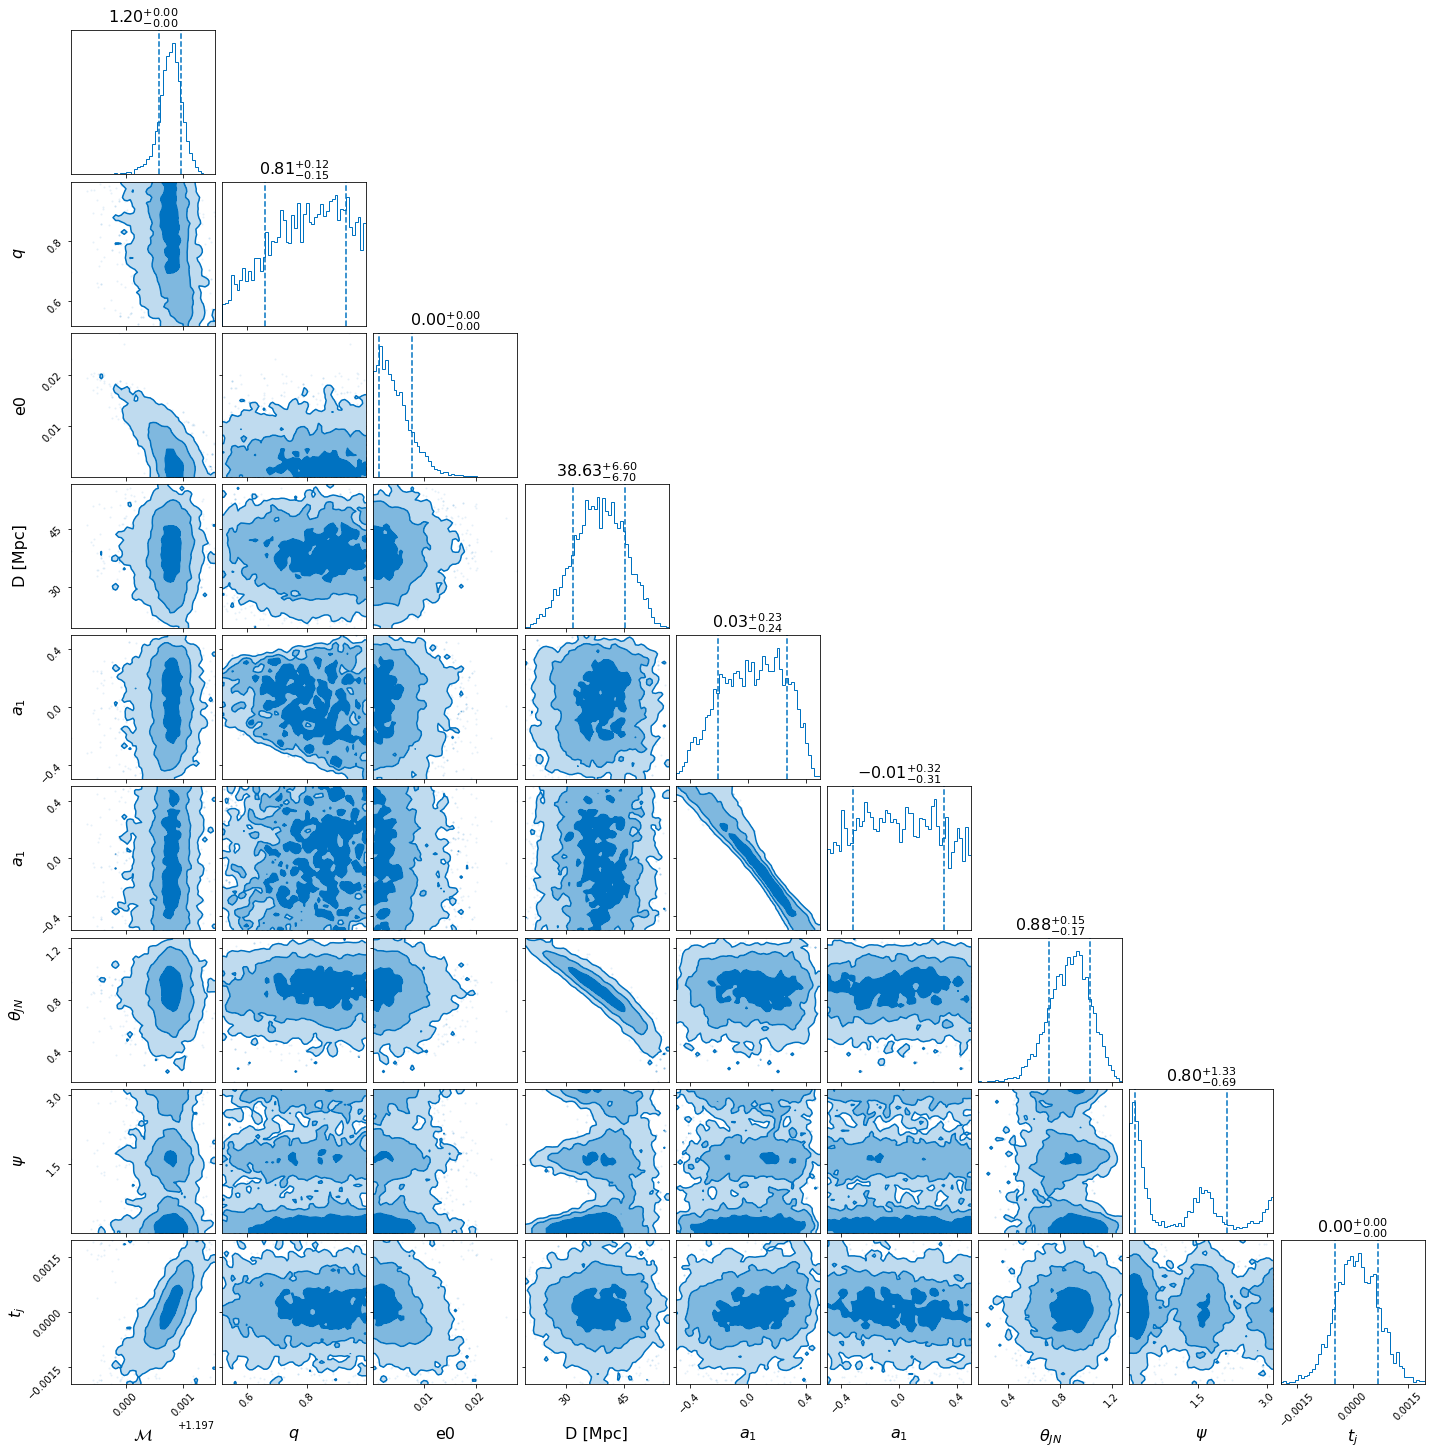

In [3]:
result.plot_corner(outdir='.')

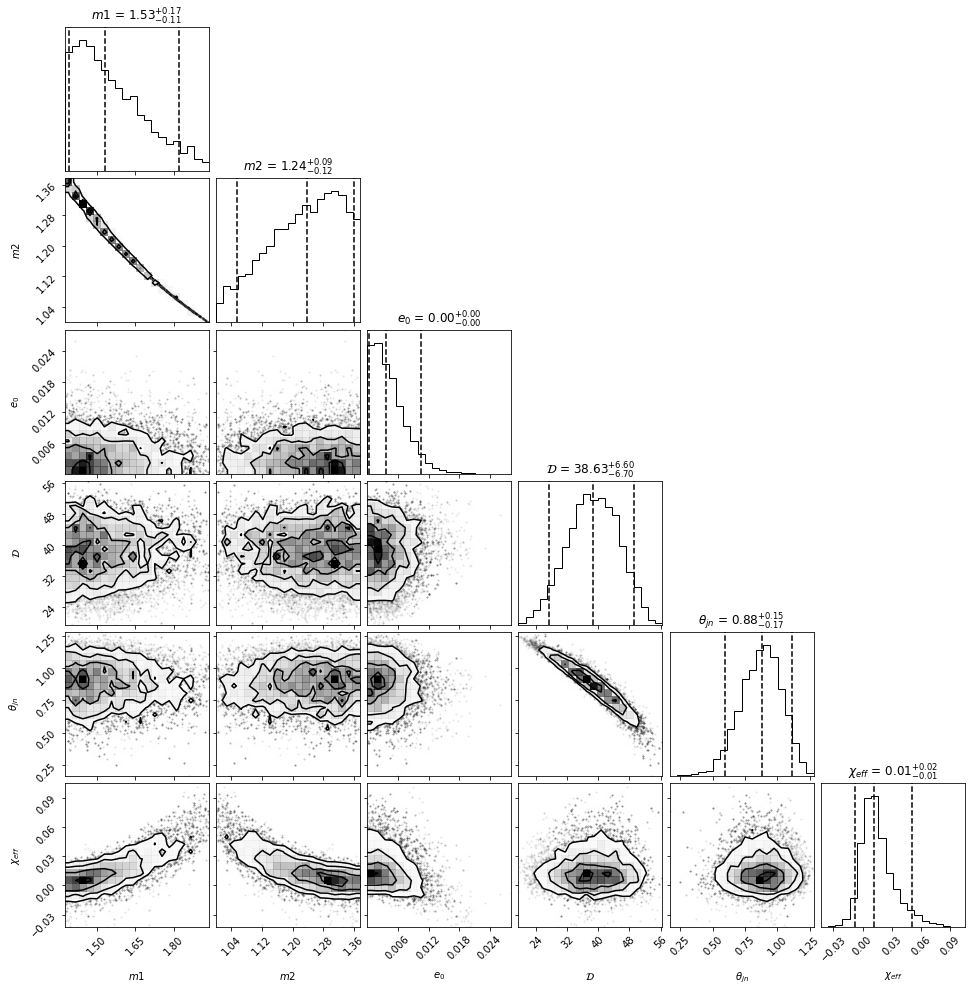

In [8]:
# TaylorF2Ecc
## minimum-frequency = 20Hz
chirp_mass_ = result.posterior["chirp_mass"].values
mass_ratio_ =  result.posterior["mass_ratio"].values
theta_jn = result.posterior["theta_jn"].values
e0 = result.posterior["eccentricity"].values
D = result.posterior["luminosity_distance"].values

m1 = (chirp_mass_*(1+mass_ratio_)**(1/5))/mass_ratio_**(3/5)
m2 = chirp_mass_*mass_ratio_**(2/5)*(1+mass_ratio_)**(1/5)
a_1 = result.posterior["a_1"].values
a_2 = result.posterior["a_2"].values
chi_eff = (a_1*m1+a_2*m2)/(m1+m2)

data = np.transpose(np.array([m1, m2,e0,D,theta_jn,chi_eff]))
figure = corner.corner(data, labels=[r"$m1$", r"$m2$", r"$e_0$", r"$\mathcal{D}$", r"$\theta_{jn}$", r"$\chi_{eff}$"],
                       quantiles=[0.05, 0.5, 0.95],
                       show_titles=True, title_kwargs={"fontsize": 12})

In [5]:
# TaylorF2Ecc
## minimum-frequency = 20Hz
data = np.transpose(np.array([chirp_mass_,mass_ratio_,e0,theta_jn,chi_eff]))
figure = corner.corner(data, labels=[r"$\mathcal{M}$", r"$q$", r"$e_0$", r"$\theta_{jn}$", r"$\chi_{eff}$"],
                       quantiles=[0.05, 0.5, 0.95],
                       show_titles=True, title_kwargs={"fontsize": 12})